In [105]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ckanapi as ckan
from datetime import datetime
import requests     # 2.18.4
import json         # 2.0.9
from bs4 import BeautifulSoup
from urllib.request import urlopen
pd.set_option('display.max_columns', None)

## Extraccion y generacion de datos y visualizaciones muy sencillas con BeatifulSoup, Pandas y Matplotlib

variables para scraping

In [ ]:
url = "http://gonzaleschaves.gob.ar/sueldos-del-personal-municipal/sueldos-liquidos-julio-2022/"

Utilizamos BeautifulSoup: analisis de web y preparacion de algoritmo de scraping

In [47]:



data_scraping = []

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
div = soup.find("div", {"class": "page-content-new"})
figure_all = div.find_all("figure", class_="wp-block-table is-style-stripes")
for figure in figure_all:
    table = figure.find("table")
    body = table.find("tbody")
    tr = body.find_all("tr")
    for row in tr:
        
        td = row.find_all("td")
        row = [i.text for i in row]
        data_scraping.append(row)



Generamos el DataFrame con los datos de los sueldos

In [48]:
sueldos = pd.DataFrame(data_scraping, columns=['Legajo', 'Nombre y Apellido', 'Sueldo'])
sueldos.head()

,Legajo,Nombre y Apellido,Sueldo
0,Legajo,Apellido y Nombres,Líquido
1,77,"ETCHEVERS, Néstor Alfredo","250.444,96"
2,84,"CHALDE, María Genoveva","150.374,87"
3,93,"GANDARA, Carlos Oscar","88.384,47"
4,141,"PARADISI, José Osvaldo","65.470,81"


Exportamos el DataFrame a un archivo csv

In [49]:
df_export = sueldos.to_csv('sueldos.csv', index=False)

Cargamos Csv exportado en un DataFrame (ya no  es necesario ejecutar el scraping)

In [71]:
sueldos = pd.read_csv('sueldos.csv')
sueldos.head()


,Legajo,Nombre y Apellido,Sueldo
0,Legajo,Apellido y Nombres,Líquido
1,77,"ETCHEVERS, Néstor Alfredo","250.444,96"
2,84,"CHALDE, María Genoveva","150.374,87"
3,93,"GANDARA, Carlos Oscar","88.384,47"
4,141,"PARADISI, José Osvaldo","65.470,81"


tipos de datos

In [52]:
sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Legajo             554 non-null    object
 1   Nombre y Apellido  554 non-null    object
 2   Sueldo             554 non-null    object
dtypes: object(3)
memory usage: 13.1+ KB


### Normalizamos los datos



Pasamos datos vacios a NaN

In [53]:
nan_value = float("NaN")
sueldos_normalizado = sueldos.replace("", nan_value, inplace=True)


Quitamos Rows sucias: con datos vacios o con datos que no son sueldos

In [87]:

normalizacion = sueldos.loc[sueldos['Legajo'] != 'Legajo'].dropna()
normalizacion.astype({'Legajo': 'int64', 'Nombre y Apellido': 'str'})
normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace('.', '')
normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace(',', '.')
normalizacion = normalizacion.astype({'Legajo': int, 'Nombre y Apellido': str, 'Sueldo': float})
normalizacion.head()

C:\Users\ismael\AppData\Local\Temp\ipykernel_20040\2921275970.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace('.', '')


,Legajo,Nombre y Apellido,Sueldo
0,77,"ETCHEVERS, Néstor Alfredo",250444.96
1,84,"CHALDE, María Genoveva",150374.87
2,93,"GANDARA, Carlos Oscar",88384.47
3,141,"PARADISI, José Osvaldo",65470.81
4,204,"CHAZARRETA, Néstor Sergio",86798.12


Exportamos el DataFrame normalizado a un archivo csv

In [95]:
df_normalizado_export = normalizacion.to_csv('sueldos_normalizados.csv', index=False)

### Generamos las variables para el analisis

Traemos el DataFrame normalizado

In [96]:
sueldos = pd.read_csv('sueldos_normalizados.csv')
sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Legajo             553 non-null    int64  
 1   Nombre y Apellido  553 non-null    object 
 2   Sueldo             553 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.1+ KB


#### Variables para el analisis

In [98]:
sueldos = sueldos['Sueldo']
sueldos = []

69     573119.27
74     463532.53
324    463485.96
501    446997.10
504    411254.61
         ...    
341     37790.33
523     37436.55
225     31055.14
541     23997.16
410     22585.56
Name: Sueldo, Length: 553, dtype: float64

In [101]:



sueldo_menor_50k = 0
empleados_menores_50k = 0
sueldo_50k_75k = 0
empleados_50k_75k = 0
sueldo_75k_100k = 0
empleados_75k_100k = 0
sueldo_100k_125k = 0
empleados_100k_125k = 0
sueldo_125k_150k = 0
empleados_125k_150k = 0
sueldo_150k_200k = 0
empleados_150k_200k = 0
sueldo_200k_250k = 0
empleados_200k_250k = 0
sueldo_250k_300k = 0
empleados_250k_300k = 0
sueldo_300k_350k = 0
empleados_300k_350k = 0
sueldo_350k_400k = 0
empleados_350k_400k = 0
sueldo_mayor_400k= 0
empleados_mayor_400k = 0
sueldos_intervalos = dict()
sueldos_titulos_intervalos = []
cantidad_empleados_intervalos = dict()
sueldos_valor_intervalos = []
cantidad_empleados_valor_intervalos = []
for sueldo in sueldos:
    if sueldo < 50000:
        sueldo_menor_50k = sueldo_menor_50k + sueldo
        sueldos_intervalos['menor_50k'] = sueldo_menor_50k
        empleados_menores_50k = empleados_menores_50k + 1
        cantidad_empleados_intervalos['menor_50k'] = empleados_menores_50k
    elif sueldo >= 50000 and sueldo < 75000:
        sueldo_50k_75k = sueldo_50k_75k + sueldo
        sueldos_intervalos['50k_75k'] = sueldo_50k_75k
        empleados_50k_75k = empleados_50k_75k + 1
        cantidad_empleados_intervalos['50k_75k'] = empleados_50k_75k
    elif sueldo >= 75000 and sueldo < 100000:
        sueldo_75k_100k = sueldo_75k_100k + sueldo
        sueldos_intervalos['75k_100k'] = sueldo_75k_100k
        empleados_75k_100k = empleados_75k_100k + 1
        cantidad_empleados_intervalos['75k_100k'] = empleados_75k_100k
    elif sueldo >= 100000 and sueldo < 125000:
        sueldo_100k_125k = sueldo_100k_125k + sueldo
        sueldos_intervalos['100k_125k'] = sueldo_100k_125k
        empleados_100k_125k = empleados_100k_125k + 1
        cantidad_empleados_intervalos['100k_125k'] = empleados_100k_125k
    elif sueldo >= 125000 and sueldo < 150000:
        sueldo_125k_150k = sueldo_125k_150k + sueldo
        sueldos_intervalos['125k_150k'] = sueldo_125k_150k
        empleados_125k_150k = empleados_125k_150k + 1
        cantidad_empleados_intervalos['125k_150k'] = empleados_125k_150k
    elif sueldo >= 150000 and sueldo < 200000:
        sueldo_150k_200k = sueldo_150k_200k + sueldo
        sueldos_intervalos['150k_200k'] = sueldo_150k_200k
        empleados_150k_200k = empleados_150k_200k + 1
        cantidad_empleados_intervalos['150k_200k'] = empleados_150k_200k
    elif sueldo >= 200000 and sueldo < 250000:
        sueldo_200k_250k = sueldo_200k_250k + sueldo
        sueldos_intervalos['200k_250k'] = sueldo_200k_250k
        empleados_200k_250k = empleados_200k_250k + 1
        cantidad_empleados_intervalos['200k_250k'] = empleados_200k_250k
    elif sueldo >= 250000 and sueldo < 300000:
        sueldo_250k_300k = sueldo_250k_300k + sueldo
        sueldos_intervalos['250k_300k'] = sueldo_250k_300k
        empleados_250k_300k = empleados_250k_300k + 1
        cantidad_empleados_intervalos['250k_300k'] = empleados_250k_300k
        
    elif sueldo >= 300000 and sueldo < 350000:
        sueldo_300k_350k = sueldo_300k_350k + sueldo
        sueldos_intervalos['300k_350k'] = sueldo_300k_350k
        sueldos_intervalos['350k_400k'] = 0
        empleados_300k_350k = empleados_300k_350k + 1
        cantidad_empleados_intervalos['300k_350k'] = empleados_300k_350k
        cantidad_empleados_intervalos['350k_400k'] = empleados_350k_400k
    elif sueldo >= 350000 and sueldo < 400000:
        sueldo_350k_400k = sueldo_350k_400k + sueldo
        sueldos_intervalos['350k_400k'] = sueldo_350k_400k
        empleados_350k_400k = empleados_350k_400k + 1
        cantidad_empleados_intervalos['350k_400k'] = empleados_350k_400k
    elif sueldo >= 400000:
        sueldo_mayor_400k = sueldo_mayor_400k + sueldo
        sueldos_intervalos['mayor_400k'] = sueldo_mayor_400k
        empleados_mayor_400k = empleados_mayor_400k + 1
        cantidad_empleados_intervalos['mayor_400k'] = empleados_mayor_400k

print(len(sueldos_intervalos.keys()))
print(sueldos_intervalos)
for valor in sueldos_intervalos.values():
    sueldos_valor_intervalos.append(valor)
for valor in cantidad_empleados_intervalos.values():
    cantidad_empleados_valor_intervalos.append(f'{valor} empleados')
for titulo in sueldos_intervalos.keys():
    sueldos_titulos_intervalos.append(titulo)

print(valor)

11
{'mayor_400k': 2358389.4699999997, '350k_400k': 0, '300k_350k': 305417.94, '250k_300k': 1374244.87, '200k_250k': 1328556.37, '150k_200k': 6543134.67, '125k_150k': 5887785.239999998, '100k_125k': 10296923.269999996, '75k_100k': 12849876.990000002, '50k_75k': 11662408.819999993, 'menor_50k': 1258172.43}
29


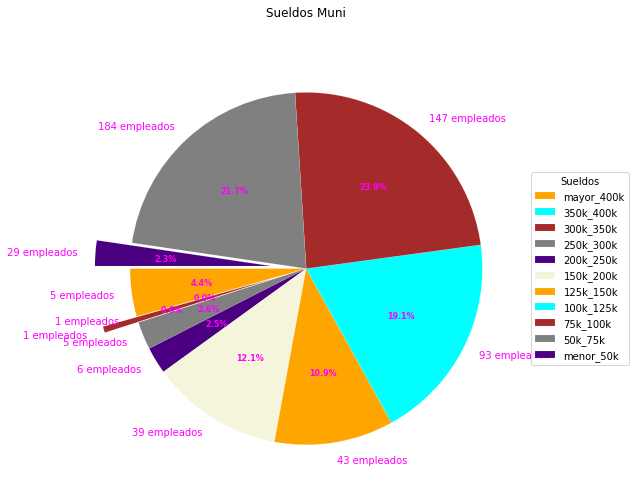

In [109]:

# Creating dataset
valores = sueldos_intervalos.keys()
empleados = cantidad_empleados_valor_intervalos
data = sueldos_valor_intervalos
# Creating explode data
explode = (0, 0, 0.2, 0, 0,0,0,0,0,0,0.2)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 0.1, 'edgecolor' : "white" }
 
# Creating autocpt arguments
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
      
       
        val = int((pct*total/100)+0.5)
        
        return '{:.1f}%'.format(pct, val)
    return my_autopct
 
# Creating plot
fig, ax = plt.subplots(figsize =(50, 7))
wedges, texts, autotexts = ax.pie(data,
                                   
                                  autopct = make_autopct(data),
                                  explode = explode,
                                  labels = empleados,
                                 
                                  colors = colors,
                                  startangle = 180,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta")
                                  )

                                 
                                  
# Adding legend
ax.legend(wedges, valores,
          title ="Sueldos",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Sueldos Muni", pad=32)
 
# show plot
plt.savefig(os.path.join('sueldos_torta.png'), dpi=600, format='png', bbox_inches='tight')
plt.show()

In [108]:

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
a = valor
bins = 20
tick_spacing = 10
plt.hist(a, bins, facecolor='r', alpha=0.7, edgecolor='k',
	linewidth=1)
plt.title("Sueldos")
plt.xlabel("valor")
plt.ylabel("empleados")
plt.text(94000,50,"Mami",ha='center',fontsize=12)
plt.savefig(os.path.join('sueldos.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

C:\Users\ismael\AppData\Local\Temp\ipykernel_20040\1155233465.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(os.path.join('sueldos.png'), dpi=300, format='png', bbox_inches='tight')


ValueError: Image size of 148966546x54156 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 35751971x12998 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 540x360 with 1 Axes>